# House Price Prediction Notebook

This notebook will detail the analysis done for house price predictions. The dataset used in this exercise can be found on kaggle at: https://www.kaggle.com/datasets/yasserh/housing-prices-datasets

Dataset Description:
This dataset has 13 features:
- price: The price of the houses 
- area: The surface area covered by the house the house
- bedrooms: Number of bedrooms in the house
- bathrooms: Number of bathrooms
- stories: Number of floors/stories 
- mainraod: Whether or not the house is connected to a mainraod
- guestroom: Whether or not the house has a guestroom
- basement: Whether or not the hose has a basement
- hotwaterheating: Whether or not the house has a hot water heater
- airconditioning: Whether or not the house has ai conditioning
- parking: Number of house parkings
- prefarea: Whether or not the house is located in a preferred area or desirable neighborhood of a city or town
- furnishingstatus: Furnishing status of the house

## Importing libraries and Uploading the data

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Data Cleaning and Visualisation

In [7]:
data = pd.read_csv("Housing.csv")
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [8]:
print(data.shape)

(545, 13)


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [10]:
print(data.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [11]:
print(data.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [12]:
print("Duplicates:", data.duplicated().sum())
data.drop_duplicates(inplace=True)

Duplicates: 0


In [ ]:
# fix text inconsistency
categorical_cols = data.select_dtypes(include=["object"]).columns
for col in categorical_cols:data[col] = data[col].str.lower().str.strip()

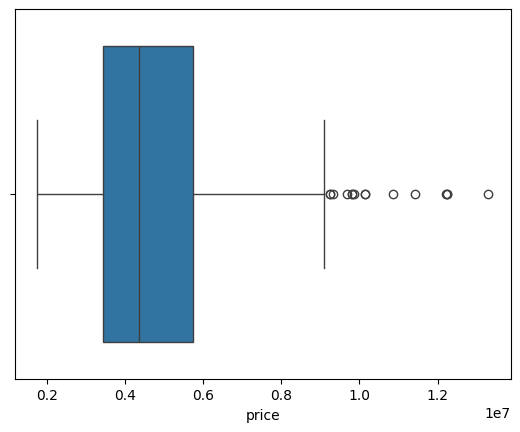

In [ ]:
# visualize outliers
sns.boxplot(x=data['price'])
plt.show()

In [18]:
# remove outliers
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

data = data[
    (data['price'] >= Q1 - 1.5 * IQR) &
    (data['price'] <= Q3 + 1.5 * IQR)
]

In [19]:
# Encode categorical variables - converts text to numbers.
data = pd.get_dummies(data, drop_first=True)

In [20]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 15 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            530 non-null    int64
 1   area                             530 non-null    int64
 2   bedrooms                         530 non-null    int64
 3   bathrooms                        530 non-null    int64
 4   stories                          530 non-null    int64
 5   parking                          530 non-null    int64
 6   mainroad_yes                     530 non-null    bool 
 7   guestroom_yes                    530 non-null    bool 
 8   basement_yes                     530 non-null    bool 
 9   hotwaterheating_yes              530 non-null    bool 
 10  airconditioning_yes              530 non-null    bool 
 11  prefarea_yes                     530 non-null    bool 
 12  furnishingstatus_semi-furnished  530 non-null    bool 

## Data Encoding for Machine Learning Analysis

## Model Training and evaluation

## Results Visualisations (?)
